# Introduction

The Ames Housing dataset,  
presents data on 81 features of houses -- mostly single family suburban dwellings -- that were sold in Ames, Iowa in the period 2006-2010, which encompasses the housing crisis.

The goal is to build a machine learning model to predict the selling price for the home, and in the process learn something about what makes a home worth more or less to buyers.

In [183]:
# importing Libraries

In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [185]:
df=pd.read_csv('Ames_Housing_Data.csv')

In [186]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

In [188]:
# Since Salesprice is our target variable , checking its correlation with other variables

In [189]:
df.corr()['SalePrice'].sort_values(ascending=False)

SalePrice          1.000000
Overall Qual       0.799262
Gr Liv Area        0.706780
Garage Cars        0.647877
Garage Area        0.640401
Total Bsmt SF      0.632280
1st Flr SF         0.621676
Year Built         0.558426
Full Bath          0.545604
Year Remod/Add     0.532974
Garage Yr Blt      0.526965
Mas Vnr Area       0.508285
TotRms AbvGrd      0.495474
Fireplaces         0.474558
BsmtFin SF 1       0.432914
Lot Frontage       0.357318
Wood Deck SF       0.327143
Open Porch SF      0.312951
Half Bath          0.285056
Bsmt Full Bath     0.276050
2nd Flr SF         0.269373
Lot Area           0.266549
Bsmt Unf SF        0.182855
Bedroom AbvGr      0.143913
Screen Porch       0.112151
Pool Area          0.068403
Mo Sold            0.035259
3Ssn Porch         0.032225
BsmtFin SF 2       0.005891
Misc Val          -0.015691
Yr Sold           -0.030569
Bsmt Half Bath    -0.035835
Low Qual Fin SF   -0.037660
MS SubClass       -0.085092
Overall Cond      -0.101697
Kitchen AbvGr     -0

##### Overall Quality and Gr Liv Area has highest positive correlation with salesPrice lets visualize it

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

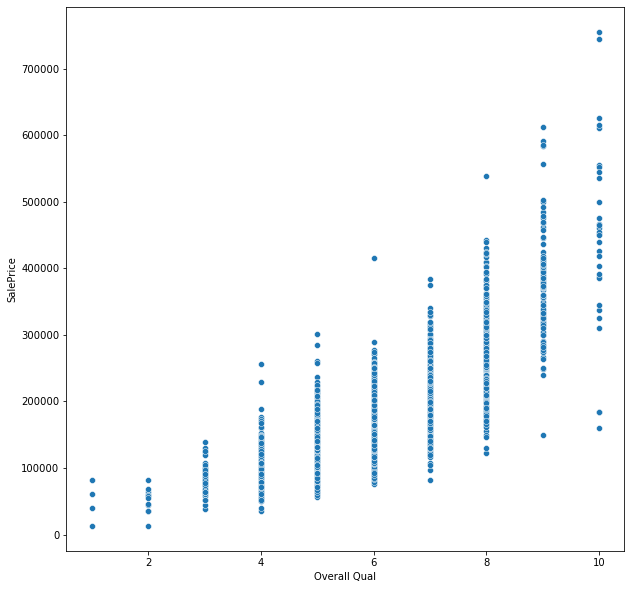

In [190]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Overall Qual',y='SalePrice',data=df)

##### Observation - As quality goes up , price goes up but there are some points around quality around10 that are below expected saleprice 

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

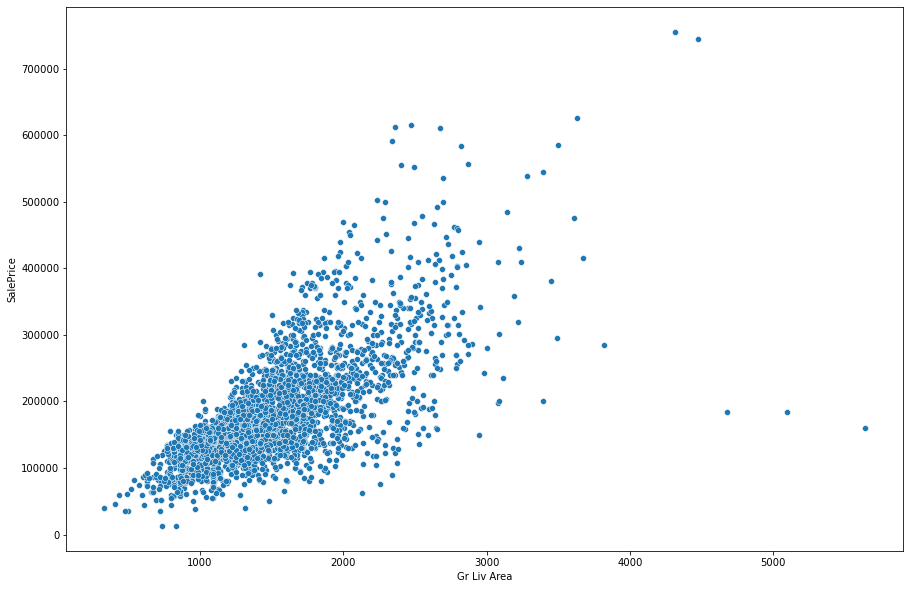

In [191]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=df)

##### Observtion - As Living Area Increases , Price Also Increases but here also we can see some points that are now following that trend

#### Finding The Outlier Points

In [192]:
df[(df['Overall Qual']>8) & (df['SalePrice']<200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [193]:
df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


#### We can see that three house are common in both sets , and can be considerd as Outliers , so we are removing them

In [194]:
drop_ind=df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)].index

In [195]:
drop_ind

Int64Index([1498, 2180, 2181], dtype='int64')

In [196]:
df=df.drop(drop_ind,axis=0)

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

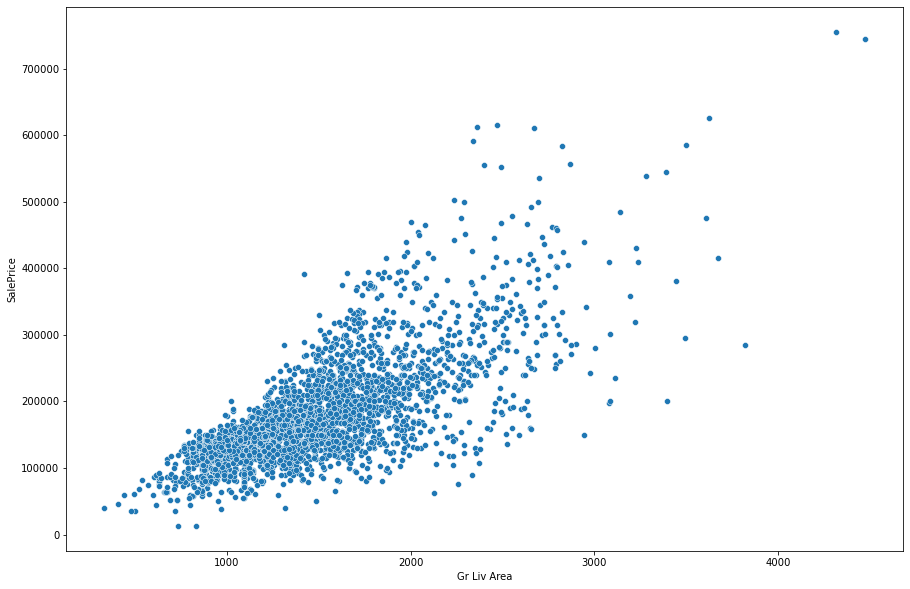

In [197]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=df)

### Missing Values

### percentage of Missing values

In [198]:
100* df.isnull().sum()/len(df) 

PID                0.00000
MS SubClass        0.00000
MS Zoning          0.00000
Lot Frontage      16.74069
Lot Area           0.00000
                    ...   
Mo Sold            0.00000
Yr Sold            0.00000
Sale Type          0.00000
Sale Condition     0.00000
SalePrice          0.00000
Length: 81, dtype: float64

#### Since PID is not providing any significant information its better to remove it from dataset

##### Writing Fuction for calculating Missing value percentage

In [199]:
df=df.drop('PID',axis=1)

In [200]:
def percent_missing(df):
    percent_nan=100* df.isnull().sum()/len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    
    return percent_nan

In [201]:
percent_nan=percent_missing(df)

In [202]:
percent_nan

Electrical         0.034165
Garage Area        0.034165
Total Bsmt SF      0.034165
Bsmt Unf SF        0.034165
BsmtFin SF 1       0.034165
BsmtFin SF 2       0.034165
Garage Cars        0.034165
Bsmt Full Bath     0.068329
Bsmt Half Bath     0.068329
Mas Vnr Area       0.785787
Mas Vnr Type       0.785787
BsmtFin Type 1     2.733174
Bsmt Qual          2.733174
Bsmt Cond          2.733174
BsmtFin Type 2     2.767339
Bsmt Exposure      2.835668
Garage Type        5.363854
Garage Finish      5.432183
Garage Qual        5.432183
Garage Cond        5.432183
Garage Yr Blt      5.432183
Lot Frontage      16.740690
Fireplace Qu      48.582166
Fence             80.457807
Alley             93.235395
Misc Feature      96.412709
Pool QC           99.590024
dtype: float64

### Visualizing Missing Value percentage

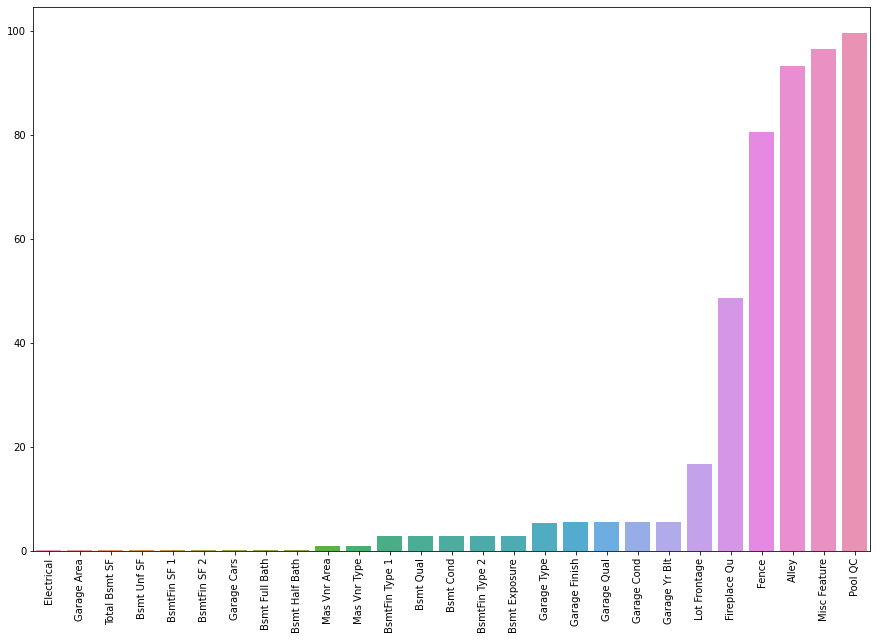

In [203]:
plt.figure(figsize=(15,10))
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

##### We have some features where a large number of rows are missing , while we have some featuures which are missing very small number of rows so its better to treat / Drop rows depending upon information available

### lets set y lim to 0 to 1  by this we will be displaying percentage of rows missing less that 1 percent

(0.0, 1.0)

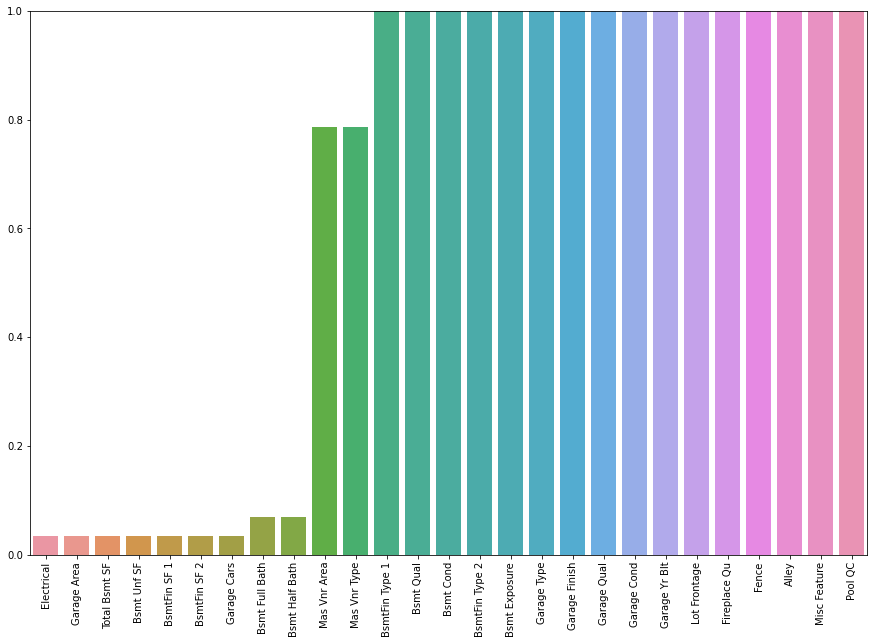

In [204]:
plt.figure(figsize=(15,10))
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);
plt.ylim(0,1)

In [205]:
percent_nan[percent_nan<1]

Electrical        0.034165
Garage Area       0.034165
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
BsmtFin SF 1      0.034165
BsmtFin SF 2      0.034165
Garage Cars       0.034165
Bsmt Full Bath    0.068329
Bsmt Half Bath    0.068329
Mas Vnr Area      0.785787
Mas Vnr Type      0.785787
dtype: float64

In [206]:
100/len(df)

0.0341646737273659

In [207]:
df[df['Electrical'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1577,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [208]:
df[df['Garage Area'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2236,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca,150909


### Only 1 Row is Missing in column "Electrical" And "Garage Area" So we are dropping that rows

In [209]:
df=df.dropna(axis=0,subset=['Electrical','Garage Area'])

In [210]:
percent_nan=percent_missing(df)

### Now re calculating our Missing values percentage that are less than one

In [211]:
percent_nan[percent_nan<1]

Bsmt Unf SF       0.034188
Total Bsmt SF     0.034188
BsmtFin SF 2      0.034188
BsmtFin SF 1      0.034188
Bsmt Full Bath    0.068376
Bsmt Half Bath    0.068376
Mas Vnr Type      0.786325
Mas Vnr Area      0.786325
dtype: float64

(0.0, 1.0)

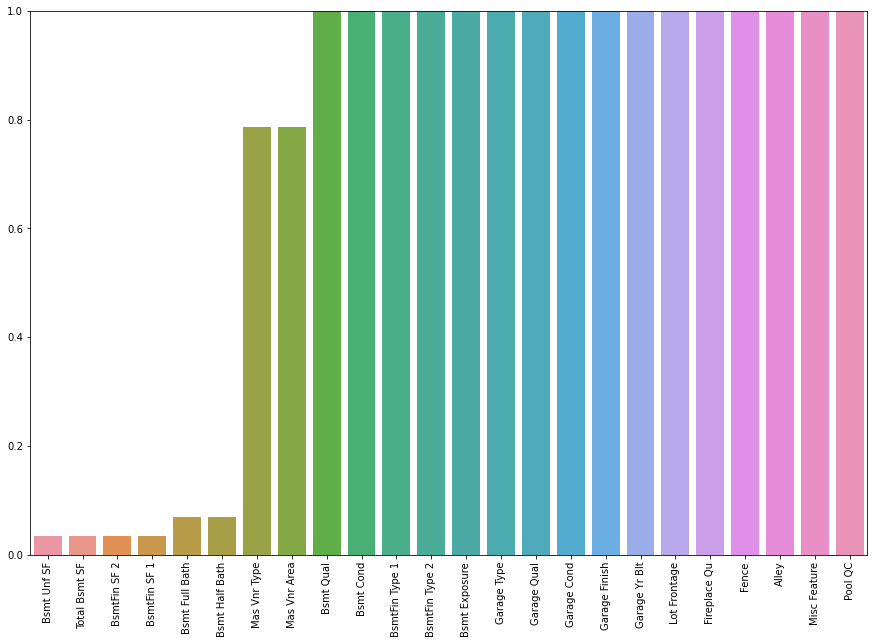

In [212]:
plt.figure(figsize=(15,10))
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);
plt.ylim(0,1)

## To better understand basments related column lets import Feature Description

In [213]:
with open('Ames_Housing_Feature_Description.txt','r') as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [214]:
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [215]:
df[df['Bsmt Full Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [216]:
df[df['Bsmt Unf SF'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


## So by description It is clear that rows which have null basment value actually dont have basement so,here what will be do

1. first we will seperate string and numeric columns related to basement
2. then for string column we will replace null value by "None"
3. for numeric column we wll replace null value by 0

In [217]:
df.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Gara

In [218]:
bsmt_num_cols=['BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','Bsmt Full Bath','Bsmt Half Bath']
df[bsmt_num_cols]=df[bsmt_num_cols].fillna(0)



In [219]:
bsmt_str_cols=['Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2']
df[bsmt_str_cols]=df[bsmt_str_cols].fillna('None')

In [220]:
df[df['Bsmt Unf SF'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


### Basment related columns are Handeled Now again calculatig percentage

In [221]:
percent_nan=percent_missing(df)

In [222]:
percent_nan[percent_nan<1]

Mas Vnr Type    0.786325
Mas Vnr Area    0.786325
dtype: float64

(0.0, 1.0)

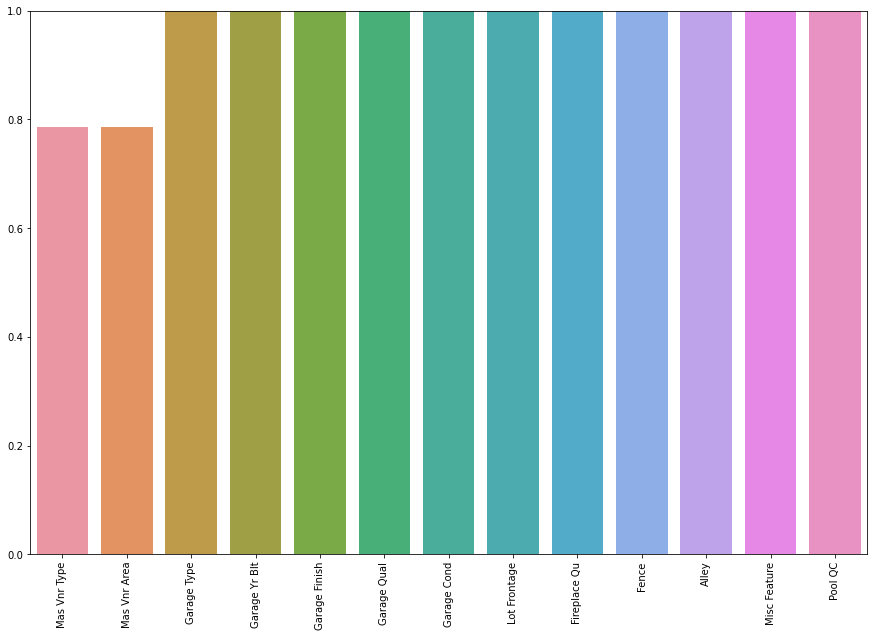

In [223]:
plt.figure(figsize=(15,10))
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);
plt.ylim(0,1)

#### For Treating Mas We will use sme strategy which we have used for treating basement ie for sting repalcing with none and for numeric replacing with 0

In [224]:
df['Mas Vnr Type']=df['Mas Vnr Type'].fillna('None')

In [225]:
df['Mas Vnr Area']=df['Mas Vnr Area'].fillna(0)

In [226]:
percent_nan=percent_missing(df)

(0.0, 1.0)

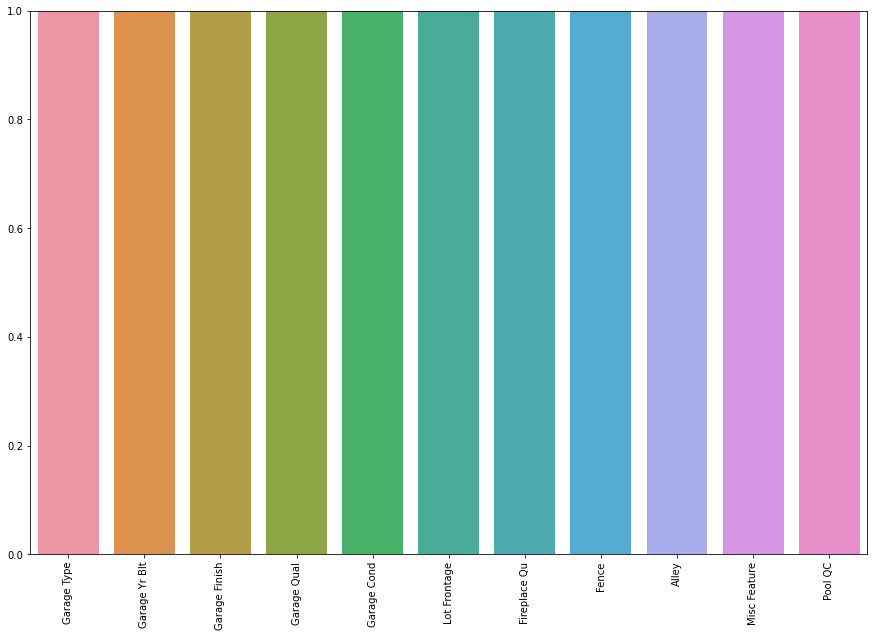

In [227]:
plt.figure(figsize=(15,10))
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);
plt.ylim(0,1)

### Now all the column containinf null value less tha 1 are treated 

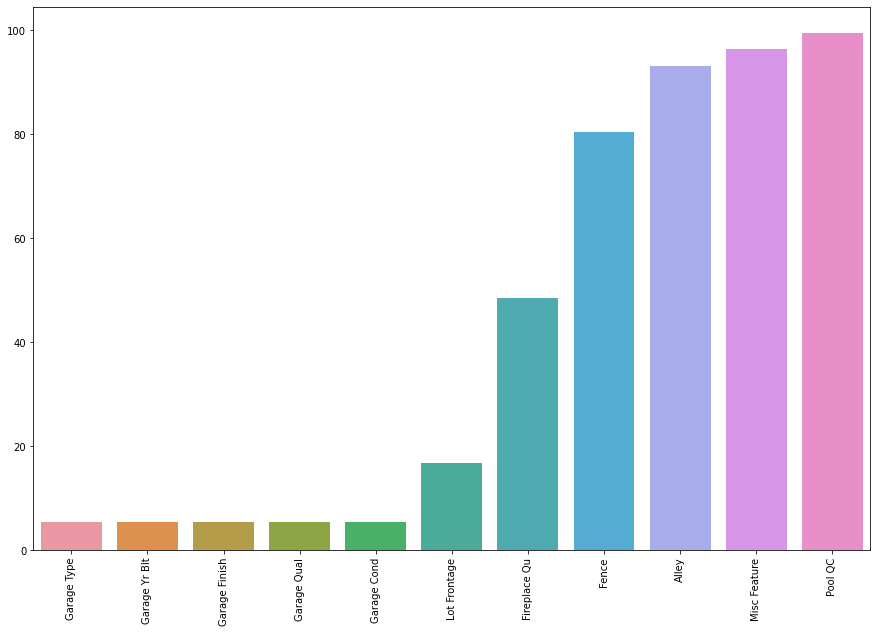

In [228]:
plt.figure(figsize=(15,10))
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

#### Now for garage agin we will use startegey that we have used for Basement and Mas ie for sting repalcing with none and for numeric replacing with 0

In [229]:
gar_str_cols=['Garage Type','Garage Finish','Garage Qual','Garage Cond']

In [230]:
df[gar_str_cols]=df[gar_str_cols].fillna('None')

In [231]:
percent_nan=percent_missing(df)

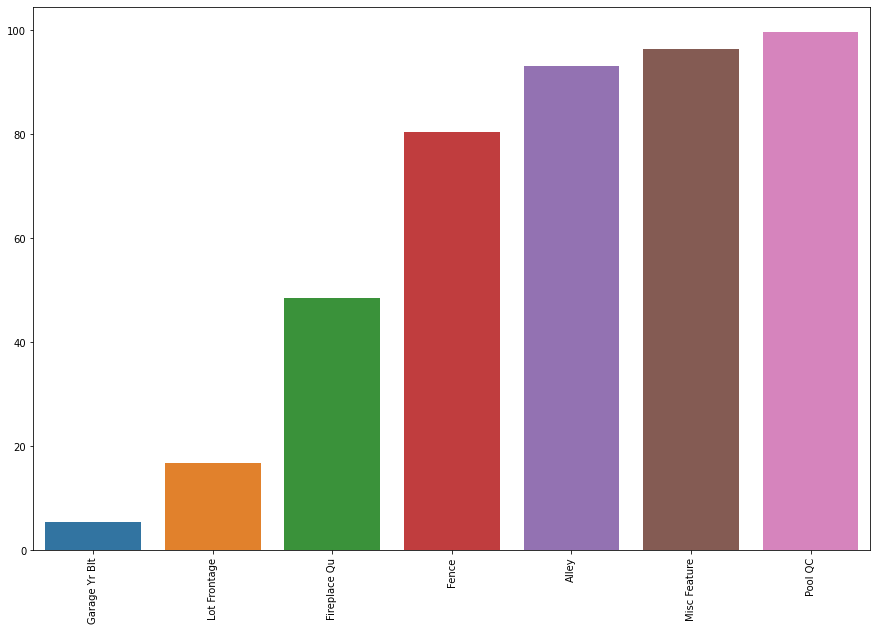

In [232]:
plt.figure(figsize=(15,10))
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [233]:
df['Garage Yr Blt']=df['Garage Yr Blt'].fillna(0)

In [234]:
percent_nan=percent_missing(df)

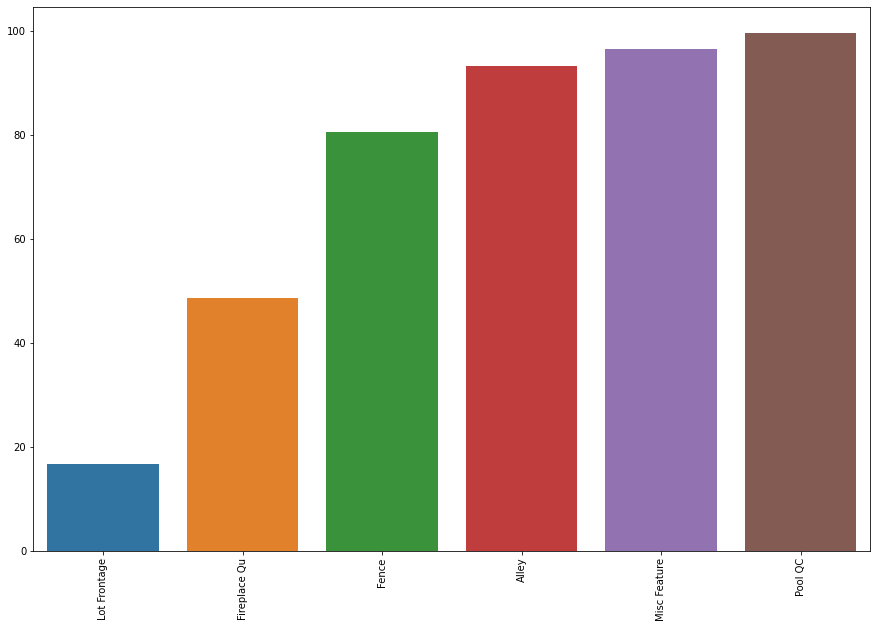

In [235]:
plt.figure(figsize=(15,10))
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

### Large data is missing from columns 'Pool QC','Misc Feature','Alley','Fence' so dropping the 

In [236]:
df=df.drop(['Pool QC','Misc Feature','Alley','Fence'],axis=1)

#### Again calculating missing percentage

In [237]:
percent_nan=percent_missing(df)

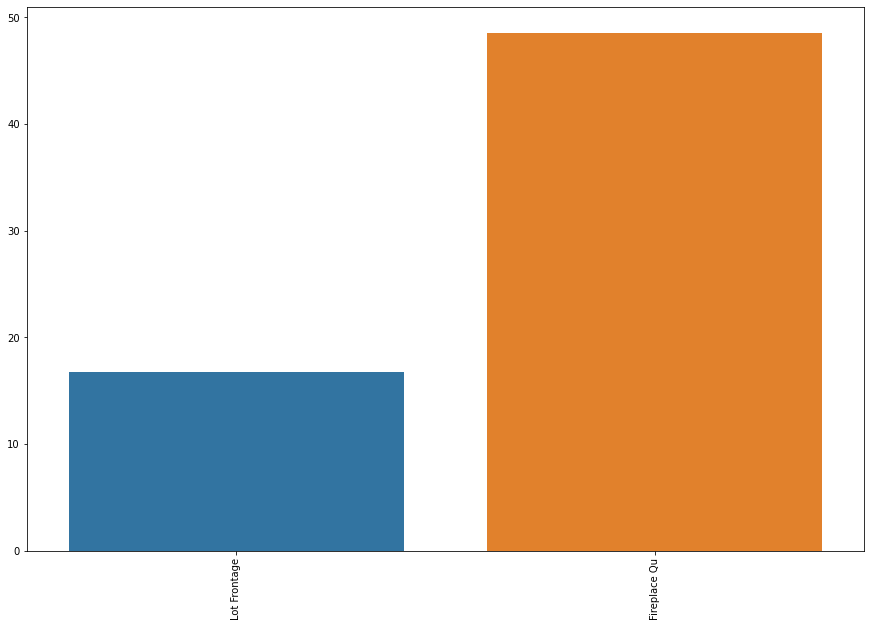

In [238]:
plt.figure(figsize=(15,10))
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [239]:
df['Fireplace Qu'].value_counts()

Gd    741
TA    600
Fa     75
Po     46
Ex     43
Name: Fireplace Qu, dtype: int64

#### As per Description null value in Column "Fireplace Qu" Means that house has no fire places so we are replacing null value with "None"

In [240]:
df['Fireplace Qu']=df['Fireplace Qu'].fillna('None')

### Now Only Lot Frntage is Left

In [241]:
df['Lot Frontage']

0       141.0
1        80.0
2        81.0
3        93.0
4        74.0
        ...  
2925     37.0
2926      NaN
2927     62.0
2928     77.0
2929     74.0
Name: Lot Frontage, Length: 2925, dtype: float64

### As per Description -


Neighborhood: Physical locations within Ames city limits

LotFrontage: Linear feet of street connected to property


**we can assume that since lotfrontage can depend on physcial location of house so we can say that lotfrontage will depend on the neighborhood of the house , so for Treating null value of LotFrontage we can calculate mean of lot frontage in each neighborhood and then we can fill in the value accordingly**

<AxesSubplot:xlabel='Lot Frontage', ylabel='Neighborhood'>

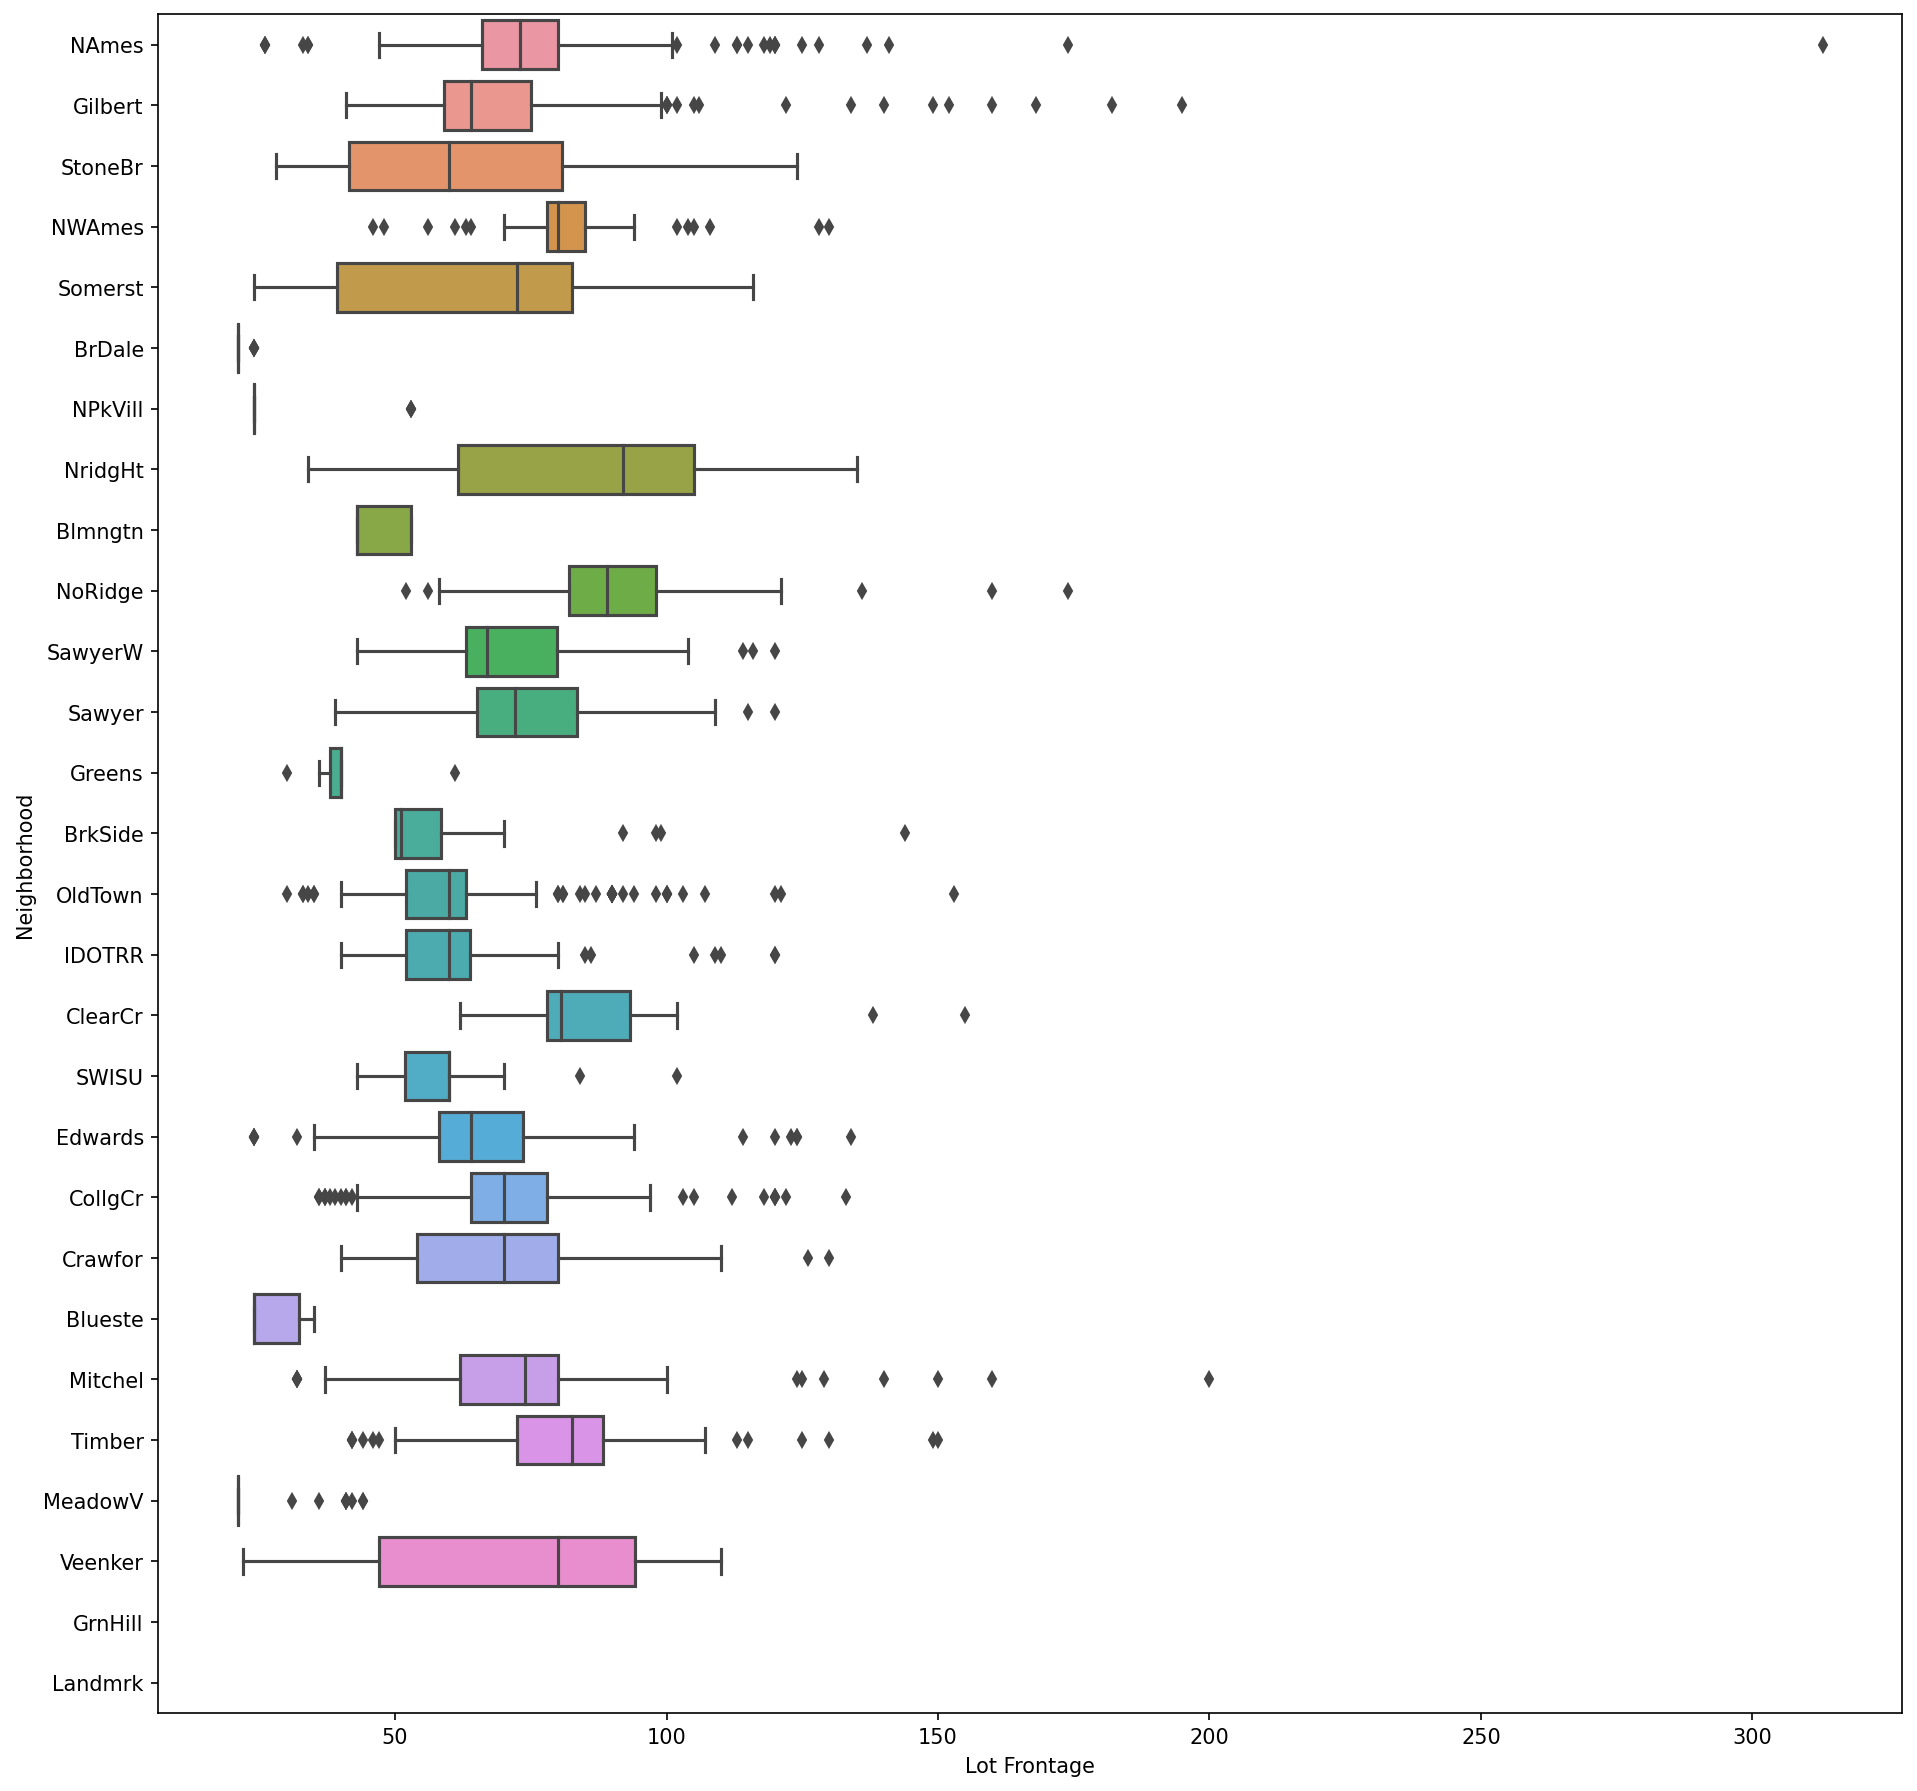

In [242]:
plt.figure(figsize=(15,15),dpi=150)
sns.boxplot(x='Lot Frontage',y='Neighborhood',data=df,orient='h')

In [243]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [244]:
df['Lot Frontage']=df.groupby('Neighborhood')['Lot Frontage'].transform(lambda value : value.fillna(value.mean()))

In [245]:
df.isnull().sum()

MS SubClass       0
MS Zoning         0
Lot Frontage      3
Lot Area          0
Street            0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 76, dtype: int64

### There are still null values in lotfrontage but it is reduced significantly we can drop remaining null values

In [246]:
df['Lot Frontage']=df['Lot Frontage'].fillna(0)

In [247]:
df.isnull().sum()

MS SubClass       0
MS Zoning         0
Lot Frontage      0
Lot Area          0
Street            0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 76, dtype: int64

## Encoding

As per Description File-

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES
       
       
       
       
       
       
       
  We Can see that although this column is numeric but actually     
       
  The Column "MS SubClass" is categorical in nature , so for encoding we have to first change it to Str

In [248]:
df['MS SubClass']=df['MS SubClass'].apply(str)

In [249]:
df.select_dtypes(include='object')

,MS SubClass,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition
0,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,TA,Typ,Gd,Attchd,Fin,TA,TA,P,WD,Normal
1,20,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
2,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Gd,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
3,20,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Ex,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
4,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,TA,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,TA,Typ,None,Detchd,Unf,TA,TA,Y,WD,Normal
2926,20,RL,Pave,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,...,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
2927,85,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,TA,Typ,None,None,None,None,None,Y,WD,Normal
2928,20,RL,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


### We will create two datasets now -
1. One data set will contain all the numeric columns from our original dataset
2. Another datast will contain all the string columns from our origianl dataset

**After That we will encode the string dataset and the dataset created after encoding will be merged with the numeric dataset 
and that merged dataset will be our final dataset**

In [250]:
my_object_df=df.select_dtypes(include='object')

In [251]:
my_numeric_df=df.select_dtypes(exclude='object')

In [252]:
my_numeric_df

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,141.000000,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,210,62,0,0,0,0,0,5,2010,215000
1,80.000000,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,140,0,0,0,120,0,0,6,2010,105000
2,81.000000,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,393,36,0,0,0,0,12500,6,2010,172000
3,93.000000,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,0,0,0,4,2010,244000
4,74.000000,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,212,34,0,0,0,0,0,3,2010,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,37.000000,7937,6,6,1984,1984,0.0,819.0,0.0,184.0,...,120,0,0,0,0,0,0,3,2006,142500
2926,75.144444,8885,5,5,1983,1983,0.0,301.0,324.0,239.0,...,164,0,0,0,0,0,0,6,2006,131000
2927,62.000000,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,...,80,32,0,0,0,0,700,7,2006,132000
2928,77.000000,10010,5,5,1974,1975,0.0,1071.0,123.0,195.0,...,240,38,0,0,0,0,0,4,2006,170000


In [253]:
df_objects_dummies=pd.get_dummies(my_object_df,drop_first=True)

In [254]:
df_objects_dummies

,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2926,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2927,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2928,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [255]:
final_df=pd.concat([my_numeric_df,df_objects_dummies],axis=1)

In [256]:
final_df

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.000000,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,0,0,0,0,1,0,0,0,1,0
1,80.000000,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,0,1,0,0,0,1,0
2,81.000000,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,0,1,0,0,0,1,0
3,93.000000,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,1,0,0,0,1,0
4,74.000000,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,37.000000,7937,6,6,1984,1984,0.0,819.0,0.0,184.0,...,0,0,0,0,1,0,0,0,1,0
2926,75.144444,8885,5,5,1983,1983,0.0,301.0,324.0,239.0,...,0,0,0,0,1,0,0,0,1,0
2927,62.000000,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,...,0,0,0,0,1,0,0,0,1,0
2928,77.000000,10010,5,5,1974,1975,0.0,1071.0,123.0,195.0,...,0,0,0,0,1,0,0,0,1,0


# Regression Part

#### Separating out our data into X features and y lables

In [257]:
X=final_df.drop('SalePrice',axis=1)

In [258]:
y=final_df['SalePrice']

#### Using Scikit learn to split X and y into a training and test set.Since we will later use Gridsearch we are setting test proportion to 10%

In [259]:
from sklearn.model_selection import train_test_split

In [260]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

#### dataset features has a variety of scales and units. For optimal regression we are scaling X features

In [261]:
from sklearn.preprocessing import StandardScaler

In [262]:
scaler=StandardScaler()

In [263]:
scaled_X_train=scaler.fit_transform(X_train)

In [264]:
scaled_X_test=scaler.transform(X_test)

#### Creating an instance of ElasticNet Model with scikit learn

In [265]:
from sklearn.linear_model import ElasticNet

In [266]:
base_elastic_model=ElasticNet()

#### Elastic net has two main parameters , alpha and l1 ratio , creating a dictionary paramete grid of values for Elastic net

In [267]:
param_grid={'alpha':[0.1,1,5,10,100],'l1_ratio':[.1,.7,99,1]}

#### usong scikit learn to create a gridSearch Cv object and run a grid search for best parameters for our model.

In [268]:
from sklearn.model_selection import GridSearchCV

In [269]:
grid_model=GridSearchCV(base_elastic_model,param_grid=param_grid,scoring='neg_mean_squared_error',cv=5,verbose=5)

In [270]:
grid_model.fit(scaled_X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ..alpha=0.1, l1_ratio=0.1;, score=-695393041.540 total time=   0.2s
[CV 2/5] END ..alpha=0.1, l1_ratio=0.1;, score=-629642289.089 total time=   0.2s
[CV 3/5] END ..alpha=0.1, l1_ratio=0.1;, score=-382086108.799 total time=   0.3s
[CV 4/5] END ..alpha=0.1, l1_ratio=0.1;, score=-410903156.308 total time=   0.2s
[CV 5/5] END ..alpha=0.1, l1_ratio=0.1;, score=-593119366.441 total time=   0.3s
[CV 1/5] END ..alpha=0.1, l1_ratio=0.7;, score=-674616989.451 total time=   0.5s
[CV 2/5] END ..alpha=0.1, l1_ratio=0.7;, score=-595342446.978 total time=   0.6s
[CV 3/5] END ..alpha=0.1, l1_ratio=0.7;, score=-380741672.747 total time=   0.4s
[CV 4/5] END ..alpha=0.1, l1_ratio=0.7;, score=-406517669.219 total time=   0.6s
[CV 5/5] END ..alpha=0.1, l1_ratio=0.7;, score=-586968645.808 total time=   0.4s
[CV 1/5] END ..............alpha=0.1, l1_ratio=99;, score=nan total time=   0.0s
[CV 2/5] END ..............alpha=0.1, l1_ratio=

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 100],
                         'l1_ratio': [0.1, 0.7, 99, 1]},
             scoring='neg_mean_squared_error', verbose=5)

### Displaying best Combination of Parameters

In [271]:
grid_model.best_params_

{'alpha': 100, 'l1_ratio': 1}

In [272]:
y_pred=grid_model.predict(scaled_X_test)

In [273]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [274]:
mean_absolute_error(y_test,y_pred)

14195.354900562173

In [275]:
np.sqrt(mean_squared_error(y_test,y_pred))

20558.508566893168

In [276]:
np.mean(final_df['SalePrice'])

180815.53743589742

### From a dataet with a average sale price is 180816  A variation of 14195 is good

In [277]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 92.0%
